In [1]:
with open('input.txt') as f:
    lines = f.readlines()

In [2]:
graph_list = []
starting_point = None
for i, line in enumerate(lines):
    row = line.strip()
    row = [c for c in row]
    graph_list.append(row)


| is a vertical pipe connecting north and south.
- is a horizontal pipe connecting east and west.
L is a 90-degree bend connecting north and east.
J is a 90-degree bend connecting north and west.
7 is a 90-degree bend connecting south and west.
F is a 90-degree bend connecting south and east.
. is ground; there is no pipe in this tile.
S is the starting position of the animal; there is a pipe on this tile, but your sketch doesn't show what shape the pipe has.

In [3]:
import networkx as nx

def create_square_graph(N, M, edges):
    """
    Create a square graph with NxM nodes and specified edges.

    Parameters:
    N (int): Number of rows
    M (int): Number of columns
    edges (list of tuples): List of edges where each edge is a tuple (node1, node2)

    Returns:
    G (networkx.Graph): The created graph
    """
    G = nx.DiGraph()
    # Add nodes
    for i in range(N):
        for j in range(M):
            G.add_node((i, j))

    # Add edges
    for edge in edges:
        G.add_edge(*edge, weight=1)


    return G

def create_list_of_edges(graph_list):
    edges = []
    starting_point = None
    for i in range(len(graph_list)):
        for j in range(len(graph_list[0])):
            if graph_list[i][j] == '|':
                edges.append(((i,j),(i-1,j)))
                edges.append(((i,j),(i+1,j)))

            elif graph_list[i][j] == '-':
                edges.append(((i,j),(i,j-1)))
                edges.append(((i,j),(i,j+1)))

            elif graph_list[i][j] == 'L':
                edges.append(((i,j),(i-1,j)))
                edges.append(((i,j),(i,j+1)))

            elif graph_list[i][j] == 'J':
                edges.append(((i,j),(i-1,j)))
                edges.append(((i,j),(i,j-1)))

            elif graph_list[i][j] == '7':
                edges.append(((i,j),(i+1,j)))
                edges.append(((i,j),(i,j-1)))

            elif graph_list[i][j] == 'F':
                edges.append(((i,j),(i+1,j)))
                edges.append(((i,j),(i,j+1)))

            elif graph_list[i][j] == 'S':
                starting_point = (i,j)

    # Add edges for the starting point
    edges_sp = []
    for edge in edges:
        if edge[1] == starting_point:
            edges_sp.append((starting_point, edge[0]))

    edges.extend(edges_sp)
        

    return edges, starting_point

In [4]:
edges, start_node = create_list_of_edges(graph_list)

In [5]:
G = create_square_graph(len(graph_list), len(graph_list[0]), edges)

In [6]:
for node in G.neighbors(start_node):
    print(node)

(127, 88)
(129, 88)


In [7]:
length = 0
for node in G.neighbors(start_node):
    for path in nx.all_simple_paths(G, start_node, node):
        if len(path) > length:
            length = len(path)
            longest_path = path

In [8]:
length / 2

6640.0

In [9]:
from shapely.geometry import Polygon, Point

In [10]:
# Create a polygon from these coordinates
poly = Polygon(longest_path)

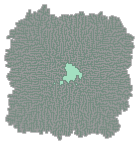

In [11]:
poly

In [12]:
enclosed_nodes_count = sum(1 for node, attr in G.nodes(data=True) if poly.contains(Point(node)))

In [142]:
enclosed_nodes_count

411

In [88]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G is your directed graph
# Create and add edges to G as shown previously

# Arrange nodes in a square (grid) layout
pos = {node: node for node in G.nodes()}

# Draw the graph
fig = plt.figure(1, figsize=(200, 80), dpi=60)
nx.draw(G, pos, with_labels=True, node_color="lightblue", font_weight='bold', edge_color='grey', node_size=1000, font_size=60)
plt.title('Graph with Nodes Arranged in a Square Grid')
plt.show()